In [70]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
print('Seaborn installed and imported!')
chicago = pd.read_csv('listings.csv')
chicago.head()

Seaborn installed and imported!


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,70,2,181,2020-10-29,2.50,1,0
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,95,2,395,2020-07-14,2.75,1,170
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,387,2020-11-16,2.77,1,0
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,53,2020-11-30,0.65,11,276
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,20,1,45,2020-09-15,0.60,2,0


In [43]:
print(chicago.shape) #The dataset has 6523 rows and 16 columns

(6523, 16)


In [44]:
chicago.info() # From the data information we can see that the data types are integers and Object(string)
#We can also observe that there are some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6523 non-null   int64  
 1   name                            6523 non-null   object 
 2   host_id                         6523 non-null   int64  
 3   host_name                       6523 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6523 non-null   object 
 6   latitude                        6523 non-null   float64
 7   longitude                       6523 non-null   float64
 8   room_type                       6523 non-null   object 
 9   price                           6523 non-null   int64  
 10  minimum_nights                  6523 non-null   int64  
 11  number_of_reviews               6523 non-null   int64  
 12  last_review                     52

In [45]:
nulldata=chicago.isnull().sum() 
nulldata


id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               6523
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1285
reviews_per_month                 1285
calculated_host_listings_count       0
availability_365                     0
dtype: int64

We can observe that the dataset has 16 columns and 6523 rows. There is an empty column neighbourhood_group and 1285 missing values from last_review and review_per_month.


In [46]:
dup=chicago.duplicated().sum() #There are 0 duplicated values
dup

0

In [47]:
Chicago=chicago.drop(['id', 'host_id','neighbourhood_group'], axis = 1)

In [48]:
Chicago.describe() #Statistics of numerical columns.

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6523.000000,6523.000000,6523.000000,6523.000000,6523.000000,5238.000000,6523.000000,6523.000000
mean,41.898720,-87.663398,150.062088,8.231489,41.671623,1.655939,14.447187,160.587460
std,0.059047,0.042387,371.581453,22.383695,67.256988,1.727131,39.621768,144.319438
min,41.651560,-87.934340,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,41.873480,-87.686660,60.000000,1.000000,1.000000,0.390000,1.000000,0.000000
50%,41.901430,-87.659590,94.000000,2.000000,13.000000,1.120000,2.000000,123.000000
75%,41.939765,-87.632985,150.000000,4.000000,53.000000,2.450000,8.000000,333.000000
max,42.022590,-87.537820,10000.000000,500.000000,655.000000,32.410000,216.000000,365.000000


In [49]:
# Summary of the categorical columns
Chicago.select_dtypes(include=['object']).describe() 

,name,host_name,neighbourhood,room_type,last_review
count,6523,6523,6523,6523,5238
unique,6351,1902,77,4,820
top,Live + Work + Stay + Easy | 1BR in Chicago,Blueground,Near North Side,Entire home/apt,2020-11-29
freq,18,216,748,4510,159


The data is not pre-processed. It has some missing values and five categorical attributes. We would need to do some processing as one-hot encoded, labeling and data cleaning.

In [50]:
drive_wheels_count=Chicago["neighbourhood"].value_counts()
print(drive_wheels_count)

Near North Side    748
West Town          730
Lake View          581
Logan Square       382
Loop               344
                  ... 
South Deering        2
Avalon Park          2
Riverdale            2
West Pullman         1
East Side            1
Name: neighbourhood, Length: 77, dtype: int64


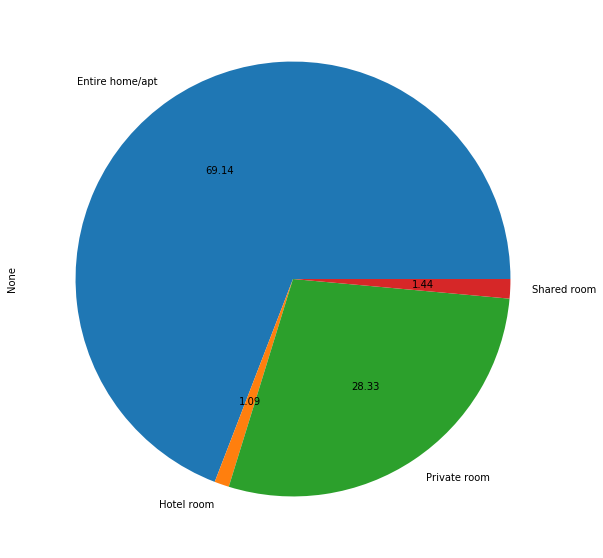

In [51]:
plt.figure(figsize=(20,10))#y is none #piechart 
Chicago.groupby('room_type').size().plot(kind='pie', autopct='%.2f')


The pie Chart in Figure 4 shows percentage of each room type in the data set. And as observed we can see that 69.14 % Entire home,  1.44% Shared room, 1.09 % Hotel room and 28.33 % Private room.


In [68]:
Chicago.describe()
#values_counts for categorical attributes
drive_wheels_count=Chicago["room_type"].value_counts()
print(drive_wheels_count)

Entire home/apt    4510
Private room       1848
Shared room          94
Hotel room           71
Name: room_type, dtype: int64


We can see that the count of room type is the following : 
Entire home/apt    4510
Private room       1848
Shared room          94
Hotel room           71

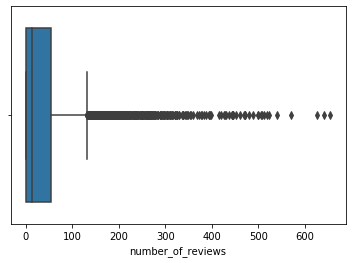

In [102]:
sns.boxplot(x=chicago['number_of_reviews'])


The box plot is a visualization of number_of_reviews values, and the data is right-skewed with some outliers. 